### Analisi dei topic trovati tramitre textrazor

<b>Step:</b>
1. Analisi considerando solo la frequenza dei topic con score > 0.1
2. Analisi considerando anche la score dei topic con score > 0.1
3. Analisi considerando solo la frequenza delle entity con score > 0.1
4. Analisi considerando anche la score delle entity con score >0.1

In [124]:
import pandas as pd
import logging
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
import time
import pprint
import pickle
import random
import numpy as np
from sklearn.metrics import accuracy_score,precision_recall_curve, average_precision_score, confusion_matrix
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
import re
import json
import pandas
import operator
from functools import reduce
import editdistance
import copy
import regex
from nltk.tokenize import RegexpTokenizer
from string import punctuation
from nltk.corpus import stopwords
import textrazor

In [125]:
from sklearn.metrics.pairwise import cosine_similarity

In [126]:
from collections import OrderedDict

In [127]:
cognomi = pickle.load( open( "cognomi_analisi.p", "rb" ) )

In [128]:
cognomi

{'I': ['GRONCHI', 'MARTINO', 'LEONE', 'MORO', 'SEGNI'],
 'XII': ['LUCIANO VIOLANTE',
  'LORENZO ACQUARONE',
  'RAFFAELE DELLA \\ALLE',
  'IRENE PIVETTI',
  'IGNAZIO LA RUSSA'],
 'XVII': ['ROBERTO GIACHETTI',
  'SIMONE BALDELLI',
  'MARINA SERENI',
  'LUIGI DI MAIO',
  'LAURA BOLDRINI'],
 'XVIII': ['ETTORE ROSATO',
  'FABIO RAMPELLI',
  'MARIA ROSARIA CARFAGNA',
  'ROBERTO FICO',
  'MARIA EDERA SPADONI']}

In [129]:
result = {}

In [130]:
for l in cognomi:
    result[l] = {}
    for cog in cognomi[l]:
        try: 
            file = (pickle.load( open( 'Result_topic_'+l+'/'+cog+"_0.p", "rb" ) ))
            result[l][cog] = []
            result[l][cog].append(file)
        except:
            print(cog)
        try:
            file2 = (pickle.load( open( 'Result_topic_'+l+'/'+cog+"_1.p", "rb" ) ))
            result[l][cog].append(file)
        except:
            print(cog)

In [131]:
#metto insieme la part 1 e la part 2 di ciascun politico

ordered_result = {}

for l in result.keys():
    ordered_result[l] = {}
    for cog in result[l]:
        ordered_result[l][cog] = {}
        ordered_result[l][cog]['topic'] = []
        ordered_result[l][cog]['entity'] = []
        for part in result[l][cog]:
            ordered_result[l][cog]['entity'] = ordered_result[l][cog]['entity'] + part['entity']
            ordered_result[l][cog]['topic'] = ordered_result[l][cog]['topic'] + part['topic']
            
    

In [ ]:
pprint((ordered_result['I']['GRONCHI']['topic'][0]))

## Topic Analysis ##

In [132]:
#media dei topic, per capire il valore di soglia da impostare

for l in ordered_result.keys():
    for cog in ordered_result[l]:
        somma = 0
        cont = 0
        for top in ordered_result[l][cog]['topic']:
            for t in top:
                somma = somma + t[1]
                cont = cont + 1
        try:
            print(cog+" "+str(somma/cont))
        except: print(cog)

GRONCHI 0.2500982847461964
MARTINO 0.24859300595424697
LEONE 0.24300811483129367
MORO 0.2408069035376395
SEGNI 0.2229830742937296
LUCIANO VIOLANTE 0.24984570447047685
LORENZO ACQUARONE 0.24923569273949667
RAFFAELE DELLA \ALLE 0.2572157812018492
IRENE PIVETTI 0.2565331510983908
IGNAZIO LA RUSSA 0.23455589051610198
ROBERTO GIACHETTI 0.24626569460263803
SIMONE BALDELLI 0.24138626112889738
MARINA SERENI 0.25032588542038897
LUIGI DI MAIO 0.2411029297208908
LAURA BOLDRINI 0.226450756750061
ETTORE ROSATO 0.23214091886348184
FABIO RAMPELLI 0.2316267153601876
MARIA ROSARIA CARFAGNA 0.23442041889483145
ROBERTO FICO 0.234238250318907
MARIA EDERA SPADONI 0.23591342955119127


In [133]:
#considero solo i topic con valore > 0.1

topic_reduct = {}
for l in ordered_result.keys():
    for cog in ordered_result[l]:
        topic_reduct[cog] = []
        for dis in ordered_result[l][cog]['topic']:
                li = []
                for t in dis:
                    if t[1] > 0.1:
                        li.append(t)
                topic_reduct[cog].append(li)

### Frequency topic ###
Per ora non considero la score di ciascun topic, solo la sua frequenza.

In [134]:
#conto quante volte un politico ha un topic, senza considerarne l'intensità (score)

topic = {}
for cog in topic_reduct.keys():
    topic[cog] = {}
    for dis in topic_reduct[cog]:
        for t in dis:
            if t[0] in topic[cog].keys():
                topic[cog][t[0]] = topic[cog][t[0]] +1
            else: topic[cog][t[0]] = 1

In [136]:
#normalizzo con max_f

topic_dict = {}
for cog in topic.keys():
    
    max_f = list(sorted(topic[cog].items(), key=lambda x: x[1], reverse = True))[0][1]    
    topic_dict[cog] = {elem:(topic[cog][elem]/max_f) for elem in topic[cog].keys()}

In [138]:
#frequenza ordinata in maniera crescente dei topic presenti
for cog in topic_dict.keys():
    topic_dict[cog] = {k: v for k, v in sorted(topic_dict[cog].items(), key=lambda item: item[1], reverse = True)}

#### Cosine similarity - frequency topic

In [142]:
for c in topic_dict:
    print(c)
    print(len(topic_dict[c]))

GRONCHI
2211
MARTINO
2423
LEONE
2243
MORO
3807
SEGNI
2524
LUCIANO VIOLANTE
1995
LORENZO ACQUARONE
2370
RAFFAELE DELLA \ALLE
1737
IRENE PIVETTI
1689
IGNAZIO LA RUSSA
2152
ROBERTO GIACHETTI
2419
SIMONE BALDELLI
2190
MARINA SERENI
2304
LUIGI DI MAIO
2334
LAURA BOLDRINI
2439
ETTORE ROSATO
1966
FABIO RAMPELLI
2385
MARIA ROSARIA CARFAGNA
2134
ROBERTO FICO
2242
MARIA EDERA SPADONI
2460


#### Ciclo con similarity frequency topic su tutti i politici

In [145]:
def similarity_topic(cog, c, topic_set, topic_dict):
    pol1 = {}
    pol2 = {}
      
    for w in topic_set:
        if w not in topic_dict[cog].keys():
            pol1[w] = 0
        else:
            pol1[w] = topic_dict[cog][w]
            
        if w not in topic_dict[c].keys():
            pol2[w] = 0   
        else: 
            pol2[w] = topic_dict[c][w]
            
    final_val = {}
    final_val[cog] = OrderedDict(sorted(pol1.items(), key=lambda t: t[0]))
    final_val[c] = OrderedDict(sorted(pol2.items(), key=lambda t: t[0]))
    
    only_val = {}
    only_val[cog] = []
    only_val[c] = []
    
    for k in final_val[cog].keys():
        only_val[cog].append(final_val[cog][k])
        
    for k in final_val[c].keys():
        only_val[c].append(final_val[c][k])
        
    return cosine_similarity([only_val[c]],[only_val[cog]])

In [146]:
def create_matrix(data_topic):
    matrixdata_topic = []
    
    for cog in data_topic.keys():
        m = []
        for l in data_topic[cog]:
            m.append((round(float(l[1][0]),5)))
        matrixdata_topic.append(m)
        
    data = np.array(matrixdata_topic)
    data = data.transpose()
    data = np.array(data)
    shape = ( len(data_topic.keys()), len(data_topic.keys()) )
    data = data.reshape( shape )
    data = np.array(data)

    return data

In [147]:
def heatmap_cosine(data, data_labels, title, save):
    #fig,ax= plt.subplots(2,2, figsize=(16,10))
    fig,ax= plt.subplots()
    
    labels = []
    for k in data_labels.keys():
        if k =='RAFFAELE DELLA \ALLE':
            labels.append('DELLA VALLE')
        elif k =='IGNAZIO LA RUSSA':
            labels.append('LA RUSSA')
        elif k =='LUIGI DI MAIO':
            labels.append('DI MAIO')
        elif len(k.split(' '))>1:
            labels.append(k.split(' ')[-1])
        else:
            labels.append(k)
    
    ax.matshow(data, cmap=plt.cm.Purples, vmin=min(0,min([min(elem) for elem in data])-0.15), vmax=1,)
    
    for i in range(len(data_labels.keys())):
        for j in range(len(data_labels.keys())):
            c = data[j,i]
            ax.text(i, j, round(c,3), va='center', ha='center', color ='white', weight='bold', size=14)
    
    ax.set_title(title, size = 20)
    
    ax.set_xticks(np.arange(len((data_labels.keys()))))
    ax.set_yticks(np.arange(len(data_labels.keys())))

    ax.set_yticklabels(labels, size = 14, rotation = 45)
    ax.set_xticklabels(labels, size = 14, rotation = 90 )
    
    #plt.colorbar(data=data)

    fig.set_size_inches(17, 17)
    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
    plt.show()
    fig.savefig('Images/Topic/'+save+'.png', dpi=100, bbox_inches='tight')

In [148]:
#Ciclo similarity considerando solo cont dei topic
data_topic = {}

for cog in topic_dict:
        data_topic[cog] = []

        for c in topic_dict:
            topic_set = set(topic_dict[cog].keys()).union(set(topic_dict[c].keys()))

            val = similarity_topic(cog,c,topic_set, topic_dict)
            data_topic[cog].append((c,val))

In [149]:
data = create_matrix(data_topic)

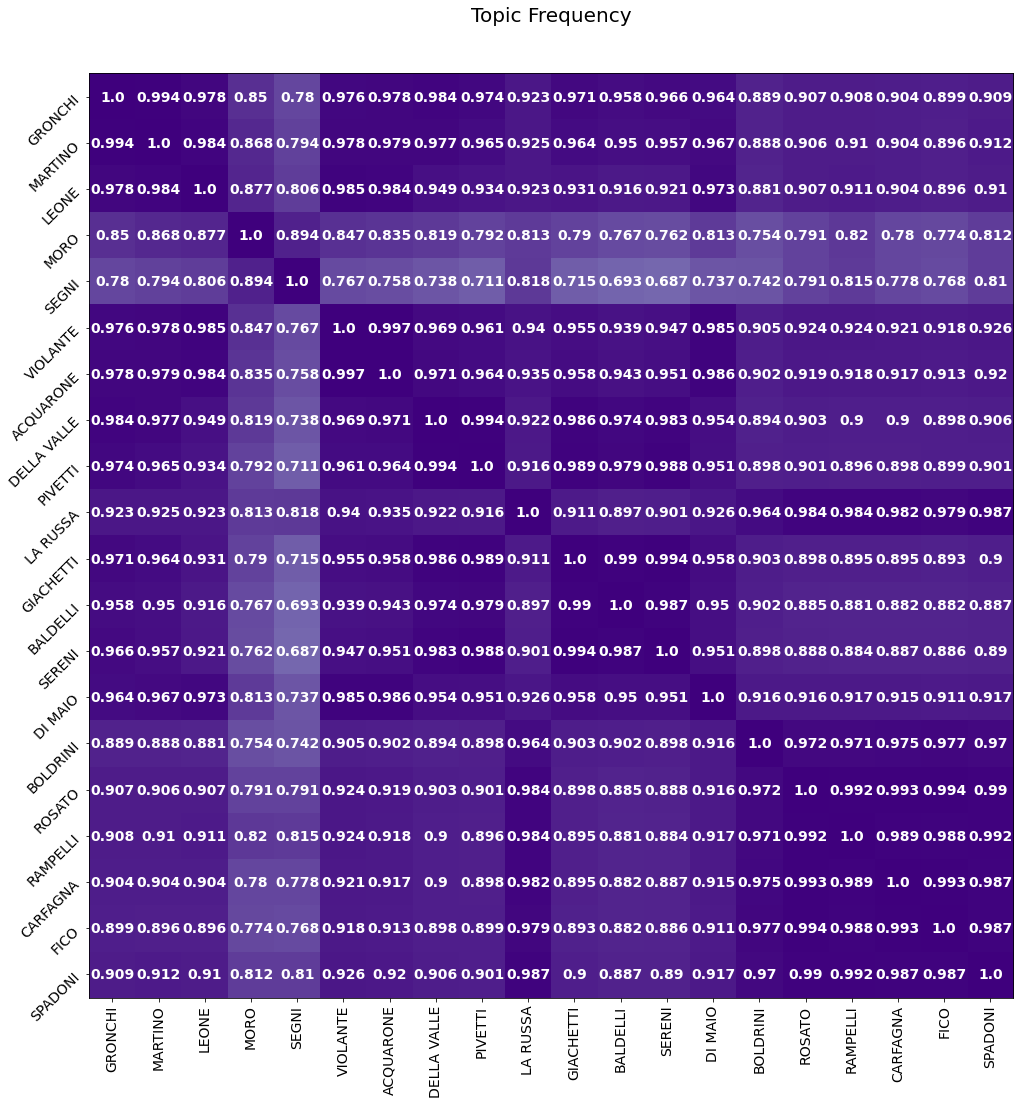

In [150]:
heatmap_cosine(data,data_topic, 'Topic Frequency', 'topic_frequency')

### Score topic
Considero solo i topic con score > 0.1 (25 percentile)

In [151]:
topic_value = {}

for cog in topic_dict.keys():
    topic_value[cog] = {elem:[] for elem in topic_dict[cog].keys()}

for cog in topic_dict.keys():
    for dis in topic_reduct[cog]:
        for t in dis:
            topic_value[cog][t[0]].append(t[1])

 #divido per il max_somma_score, è come dividere per la max_freq solo che al posto che sommare 1 sommo valore della score

In [152]:
#sommo tutte le score dei topic e poi le divido per max_freq
topic_dict_value = {cog: {} for cog in topic_value.keys()}

for cog in topic_value.keys():
    topic_dict_value[cog] = {t:sum(topic_value[cog][t]) for t in topic_value[cog].keys()}

In [153]:
# divido per max_freq

for cog in topic_value.keys():
    max_f = list(sorted(topic_dict_value[cog].items(), key=lambda x: x[1], reverse = True))[0][1]
    topic_dict_value[cog] = {t:topic_dict_value[cog][t]/max_f for t in topic_dict_value[cog].keys()}

In [154]:
for cog in topic_value.keys():
    print(cog)
    pprint(list(sorted(topic_dict_value[cog].items(), key=lambda x: x[1], reverse = True))[0:10])

GRONCHI
[('Government', 1.0),
 ('Politics', 0.9234298115645313),
 ('Law', 0.8881098119502094),
 ('Justice', 0.758040165069856),
 ('Social institutions', 0.7259385616167588),
 ('Human activities', 0.7220966539286044),
 ('Public sphere', 0.6602288030185672),
 ('Government information', 0.5866411851861381),
 ('Public law', 0.5374460453620707),
 ('Constitutional law', 0.48665998695125356)]
MARTINO
[('Government', 1.0),
 ('Politics', 0.9217196527510306),
 ('Law', 0.8651875993797713),
 ('Justice', 0.7432392126653035),
 ('Social institutions', 0.7115119552013279),
 ('Human activities', 0.6990793359209106),
 ('Public sphere', 0.6586364848448935),
 ('Government information', 0.5790982983220252),
 ('Public law', 0.522862927518197),
 ('Constitutional law', 0.45855312928999653)]
LEONE
[('Government', 1.0),
 ('Politics', 0.9260645251179156),
 ('Law', 0.8855922861627097),
 ('Justice', 0.7812071516090291),
 ('Human activities', 0.7396821689225458),
 ('Social institutions', 0.7384581340742291),
 ('Pub

In [155]:
cognomi_legis = {}
for l in cognomi.keys():
    for c in cognomi[l]:
        cognomi_legis[c]=l

In [159]:
#frequenza ordinata in maniera crescente dei topic presenti
for cog in topic_dict_value.keys():
    topic_dict_value[cog] = {k: v for k, v in sorted(topic_dict_value[cog].items(), key=lambda item: item[1], reverse = True)}

In [162]:
#Ciclo similarity considerando anche la score dei topic
data_topic_value = {}

for cog in topic_dict_value:
        data_topic_value[cog] = []

        for c in topic_dict_value:
            topic_set = set(topic_dict_value[cog].keys()).union(set(topic_dict_value[c].keys()))

            val = similarity_topic(cog,c,topic_set, topic_dict_value)
            data_topic_value[cog].append((c,val))

In [163]:
data = create_matrix(data_topic_value)

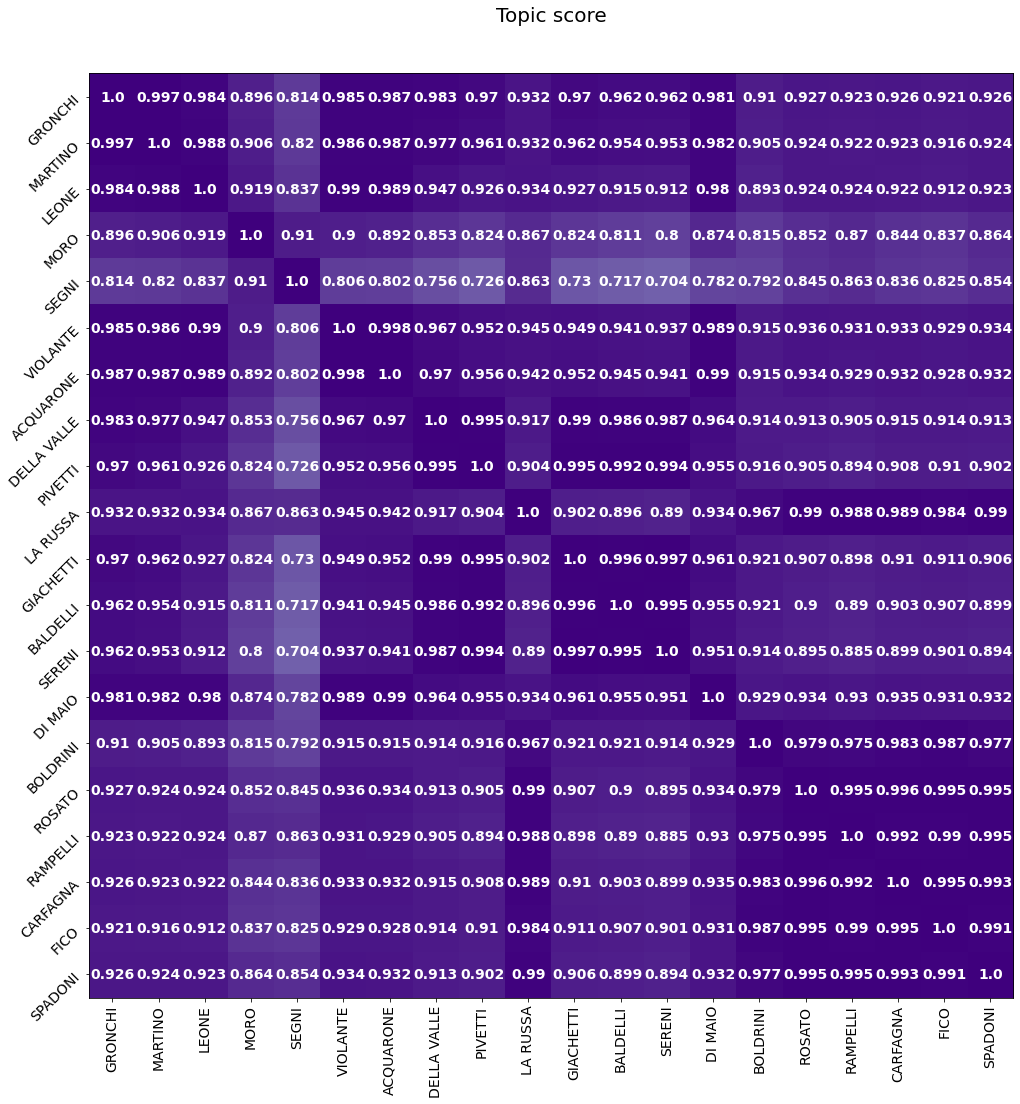

In [164]:
heatmap_cosine(data,data_topic_value, 'Topic score','topic_score' )

In [ ]:
#frequenza ordinata in maniera crescente dei topic presenti
for cog in topic_dict_value.keys():
    topic_dict_value[cog] = {k: v for k, v in sorted(topic_dict_value[cog].items(), key=lambda item: item[1], reverse = True)}

In [ ]:
pol_analyzed = ['GRONCHI', 'LUCIANO VIOLANTE', 'ROBERTO GIACHETTI', 'ETTORE ROSATO']
topic_analyzed = []

for cog in pol_analyzed:
    topic_analyzed.extend([elem for elem in topic_dict_value[cog].keys()][0:10])
    
topic_analyzed = set(topic_analyzed)

In [ ]:
N = 256
cmap1 = plt.cm.get_cmap('Pastel2_r')
cmap3 = plt.cm.get_cmap('tab10')
cmap2 = plt.cm.get_cmap('Pastel1_r')
#cmap4 = plt.cm.get_cmap('prism_r')
colors1 = cmap1(np.arange(cmap1.N))
colors2 = cmap2(np.arange(cmap2.N))
colors3 = cmap3(np.arange(cmap3.N))
#colors4 = cmap4(np.arange(cmap4.N))
colors = []
colors.extend(colors1)
colors.extend(colors2)
colors.extend(colors3)
#colors.extend(colors4)
#colors = ['lightgreen','lightskyblue','lightpink','aquamarine','salmon', 'mediumslateblue'] 
cmap = {ca:col for ca,col in zip(topic_analyzed, colors)}

In [ ]:
pol = 'ETTORE ROSATO'

names = [elem for elem in topic_dict_value[pol].keys()][0:10]
values = [topic_dict_value[pol][elem] for elem in topic_dict_value[pol].keys()][0:10]

fig = plt.figure(figsize=(14,4))

for x in range(0,10):
    c = names[x]
    r = plt.bar(x,values[x], color = cmap[c])
    
#plt.bar(names, values, color = )
plt.xticks(np.arange(10),names, rotation = 90, size = 13)
plt.yticks(size = 13)
#plt.grid(True)
plt.title('ROSATO - XVIII legislature')
plt.show()

fig.savefig('Images/Topic/'+pol+' topic_freq_nogrid.png', dpi=100, bbox_inches='tight')

## Entities analysis

### Frequency entities
Per ora considero solo la frequnecy delle entities, senza considerare la score.

In [165]:
#media dei topic, per capire il valore di soglia da impostare

for l in ordered_result.keys():
    for cog in ordered_result[l]:
        somma = 0
        cont = 0
        for top in ordered_result[l][cog]['entity']:
            for t in top:
                if t[1] != 0:
                    somma = somma + t[1]
                    cont = cont + 1
        try:
            print(cog+" "+str(somma/cont))
        except: print(cog)

GRONCHI 0.24661918584070738
MARTINO 0.23231055401662043
LEONE 0.2603152925531907
MORO 0.34289206371114067
SEGNI 0.31172101174934597
LUCIANO VIOLANTE 0.3194715019220217
LORENZO ACQUARONE 0.3688316869647965
RAFFAELE DELLA \ALLE 0.3541392727272728
IRENE PIVETTI 0.3495444051539023
IGNAZIO LA RUSSA 0.32343129954441924
ROBERTO GIACHETTI 0.2499738022875808
SIMONE BALDELLI 0.23684013736263762
MARINA SERENI 0.17250235087719365
LUIGI DI MAIO 0.2709679418206716
LAURA BOLDRINI 0.2720967635135139
ETTORE ROSATO 0.34889786870503675
FABIO RAMPELLI 0.3646037263910152
MARIA ROSARIA CARFAGNA 0.33188200831946874
ROBERTO FICO 0.3317606701680665
MARIA EDERA SPADONI 0.3241300474333987


In [166]:
#percentile dei topic, per capire il valore di soglia da impostare

for l in ordered_result.keys():
    for cog in ordered_result[l]:
        value = []
        for top in ordered_result[l][cog]['entity']:
            if top!= []:
                value.extend([t[1] for t in top if t[1]!=0])
        if value!= []:
            print(cog+" "+str(np.percentile(value,25)))

GRONCHI 0.1187
MARTINO 0.1164
LEONE 0.13947500000000002
MORO 0.2295
SEGNI 0.189
LUCIANO VIOLANTE 0.1695
LORENZO ACQUARONE 0.1932
RAFFAELE DELLA \ALLE 0.1738
IRENE PIVETTI 0.1921
IGNAZIO LA RUSSA 0.1702
ROBERTO GIACHETTI 0.12179999999999999
SIMONE BALDELLI 0.1194
MARINA SERENI 0.08917
LUIGI DI MAIO 0.1297
LAURA BOLDRINI 0.1303
ETTORE ROSATO 0.19385000000000002
FABIO RAMPELLI 0.204175
MARIA ROSARIA CARFAGNA 0.153825
ROBERTO FICO 0.167775
MARIA EDERA SPADONI 0.1602


In [167]:
#considero solo le entity con valore > 0.1 - circa 25 percentile

entity_reduct = {}
for l in ordered_result.keys():
    for cog in ordered_result[l]:
        entity_reduct[cog] = []
        for dis in ordered_result[l][cog]['entity']:
                li = []
                for t in dis:
                    if t[1] > 0.1:
                        li.append(t)
                if li!=[]:
                    entity_reduct[cog].append(li)

In [168]:
#conto quante volte un politico ha un entity, senza considerarne l'intensità (la score)

entity = {}
for cog in entity_reduct.keys():
    entity[cog] = {}
    for dis in entity_reduct[cog]:
        for t in dis:
            if t[0] in entity[cog].keys():
                entity[cog][t[0]] = entity[cog][t[0]] +1
            else: entity[cog][t[0]] = 1

In [ ]:
#normalizzo con max_f

entity_dict = {}
for cog in entity.keys():
    
    max_f = list(sorted(entity[cog].items(), key=lambda x: x[1], reverse = True))[0][1]    
    entity_dict[cog] = {elem:(entity[cog][elem]/max_f) for elem in entity[cog].keys()}

In [170]:
#frequenza ordinata in maniera crescente dei topic presenti
for cog in entity_dict.keys():
    entity_dict[cog] = {k: v for k, v in sorted(entity_dict[cog].items(), key=lambda item: item[1], reverse = True)}

#### Ciclo con similarity frequency entities su tutti i politici

In [173]:
#Ciclo similarity considerando solo cont delle entities
data_entity = {}

for cog in entity_dict:
        data_entity[cog] = []

        for c in entity_dict:
            entity_set = set(entity_dict[cog].keys()).union(set(entity_dict[c].keys()))

            val = similarity_topic(cog,c, entity_set, entity_dict)
            data_entity[cog].append((c,val))

In [174]:
data = create_matrix(data_entity)

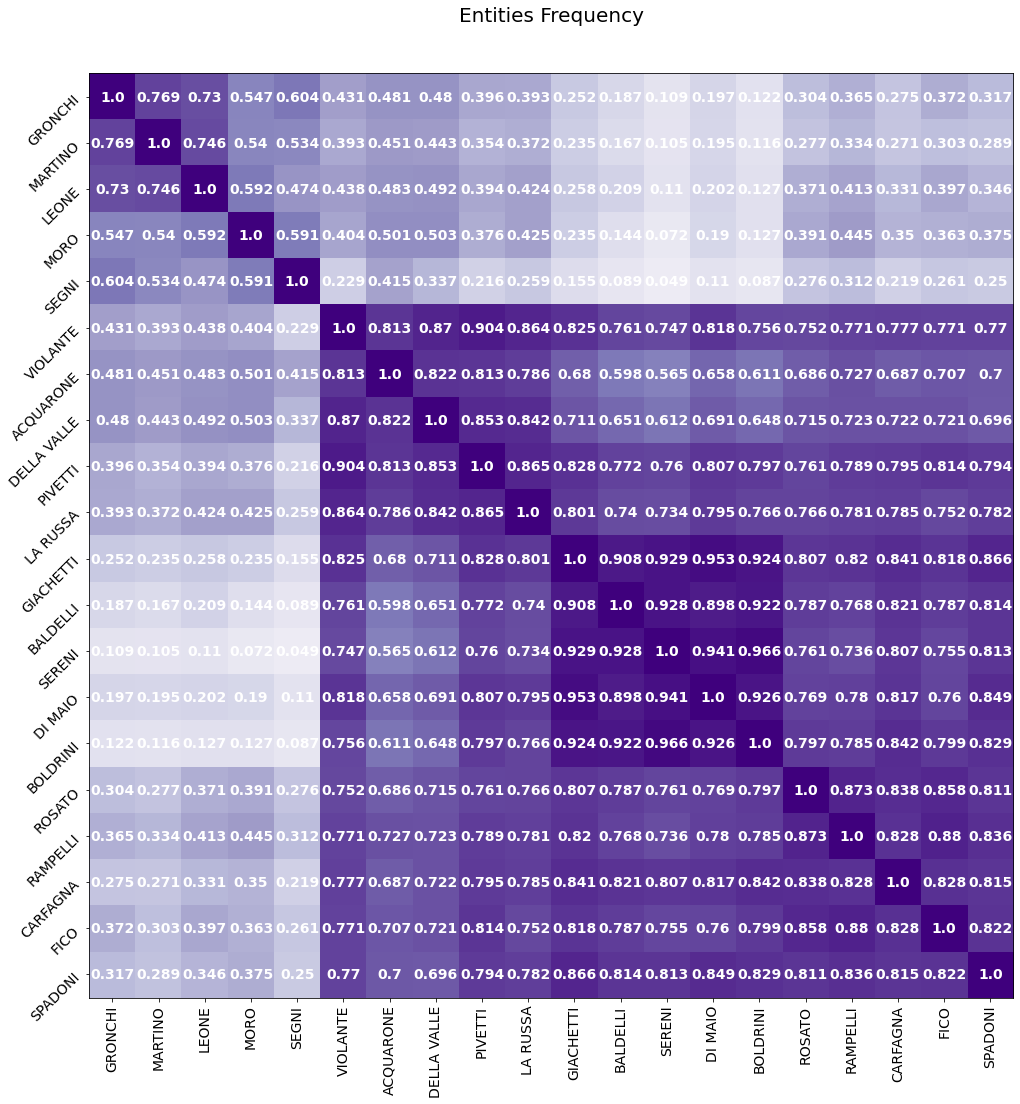

In [175]:
heatmap_cosine(data,data_entity, 'Entities Frequency', 'entity_frequency') #non è fatto con max_freq ma dovrebbe essere uguala

### Score entities 
Considero solo entities con score > 0.1 - 25 percentile

In [178]:
entity_value = {}

for cog in entity_dict.keys():
    entity_value[cog] = {elem:[] for elem in entity_dict[cog].keys()}

for cog in entity_value.keys():
    for dis in entity_reduct[cog]:
        for t in dis:
            entity_value[cog][t[0]].append(t[1])

 #dividerei per il max_somma_score, è come dividere per la max_freq solo che al posto che sommare 1 sommo valure della score

In [179]:
#sommo tutte le score delle entity e poi le divido per max_freq
entity_dict_value = {cog: {} for cog in entity_value.keys()}

for cog in entity_value.keys():
    entity_dict_value[cog] = {t:sum(entity_value[cog][t]) for t in entity_value[cog].keys()}

In [180]:
# divido per max_freq

for cog in entity_value.keys():
    max_f = list(sorted(entity_dict_value[cog].items(), key=lambda x: x[1], reverse = True))[0][1]
    entity_dict_value[cog] = {t:entity_dict_value[cog][t]/max_f for t in entity_dict_value[cog].keys()}

In [181]:
for cog in entity_value.keys():
    print(cog)
    pprint(list(sorted(entity_dict_value[cog].items(), key=lambda x: x[1], reverse = True))[0:10])

GRONCHI
[('Italia', 1.0),
 ('Agricoltura', 0.9973913443195658),
 ('Potere legislativo', 0.8256452687949623),
 ('Mezzadria', 0.8220942793445041),
 ('Fascismo', 0.8127398928957227),
 ('Deputato', 0.6903399296697236),
 ('Elezione', 0.6364200510239264),
 ('Senato', 0.5963363901721487),
 ('Guerra', 0.5592176331333747),
 ('Lingua italiana', 0.5432669102944219)]
MARTINO
[('Agricoltura', 1.0),
 ('Diritto', 0.8643820837087215),
 ('Costituzione', 0.8270657457150166),
 ('Reato', 0.73330219004082),
 ('Italia', 0.6411069215967614),
 ('Elezione', 0.5927792051786847),
 ('Deputato', 0.5923676688133295),
 ('Locazione', 0.5764845896315082),
 ('Credito', 0.5645834028496111),
 ('Codice penale italiano', 0.5190029697353936)]
LEONE
[('Italia', 1.0),
 ('Potere legislativo', 0.8268670449317583),
 ('Sport', 0.7613570807866158),
 ('Camera dei deputati (Italia)', 0.6462637194120093),
 ('Vino', 0.5341059288306644),
 ('Agricoltura', 0.5281398558503295),
 ('Codice penale italiano', 0.4709838543606371),
 ('Reato', 0

In [182]:
cognomi_legis = {}
for l in cognomi.keys():
    for c in cognomi[l]:
        cognomi_legis[c]=l

In [186]:
#frequenza ordinata in maniera crescente dei topic presenti
for cog in entity_dict_value.keys():
    entity_dict_value[cog] = {k: v for k, v in sorted(entity_dict_value[cog].items(), key=lambda item: item[1], reverse = True)}

In [188]:
#Ciclo similarity considerando anche la score dei topic
data_entity_value = {}

for cog in entity_dict_value:
        data_entity_value[cog] = []

        for c in topic_dict_value:
            entity_set = set(entity_dict_value[cog].keys()).union(set(entity_dict_value[c].keys()))

            val = similarity_topic(cog,c,entity_set, entity_dict_value)
            data_entity_value[cog].append((c,val))

In [189]:
data = create_matrix(data_entity_value)

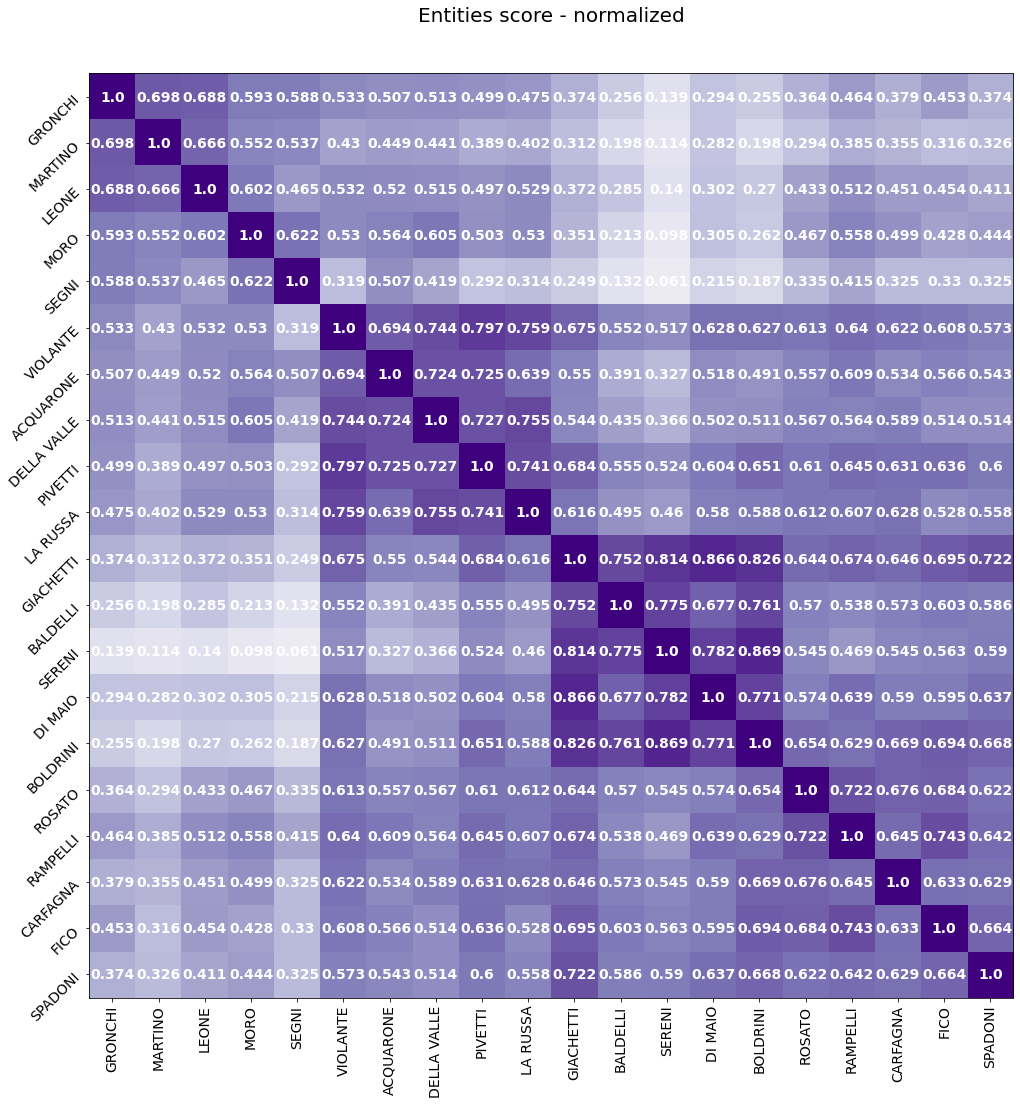

In [190]:
heatmap_cosine(data,data_entity_value, 'Entities score - normalized', 'entity_score')

In [ ]:
pol_analyzed = ['GRONCHI', 'LUCIANO VIOLANTE', 'ROBERTO GIACHETTI', 'ETTORE ROSATO']
entity_analyzed = []

for cog in pol_analyzed:
    entity_analyzed.extend([elem for elem in entity_dict_value[cog].keys()][0:10])
    
entity_analyzed = set(entity_analyzed)

In [ ]:
N = 256
cmap1 = plt.cm.get_cmap('Pastel2_r')
cmap3 = plt.cm.get_cmap('tab10')
cmap2 = plt.cm.get_cmap('Pastel1_r')
#cmap4 = plt.cm.get_cmap('prism_r')
colors1 = cmap1(np.arange(cmap1.N))
colors2 = cmap2(np.arange(cmap2.N))
colors3 = cmap3(np.arange(cmap3.N))
#colors4 = cmap4(np.arange(cmap4.N))
colors = []
colors.extend(colors3)
colors.extend(colors2)
colors.extend(colors1)
#colors.extend(colors4)
#colors = ['lightgreen','lightskyblue','lightpink','aquamarine','salmon', 'mediumslateblue'] 
cmap_entity = {ca:col for ca,col in zip(entity_analyzed, colors)}

In [ ]:
pol = 'ROBERTO GIACHETTI'

names = [elem for elem in entity_dict_value[pol].keys()][0:10]
values = [entity_dict_value[pol][elem] for elem in entity_dict_value[pol].keys()][0:10]

fig = plt.figure(figsize=(14,4))

for x in range(0,10):
    c = names[x]
    r = plt.bar(x,values[x], color = cmap_entity[c])
    
#plt.bar(names, values, color = )
plt.xticks(np.arange(10),names, rotation = 90, size = 13)
plt.yticks(size = 13)
#plt.grid(True)
plt.title('GIACHETTI - XVII legislature')
plt.show()

fig.savefig('Images/Topic/'+pol+' entity_freq_nogrid.png', dpi=100, bbox_inches='tight')